 # 🧮 Comparación de Speedup DBSCAN Paralelo vs Serial

La siguiente función permite visualizar el speedup para todos los tamaños de dataset y valida si cada versión paralela supera el speedup mínimo de 1.5.

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_speedup(N):
    """Genera gráfico de speedup y valida rendimiento mínimo para N puntos."""
    csv_file = f"output/rendimiento/{N}_results.csv"

    df = pd.read_csv(csv_file)
    
    # --- Promedio por implementación y hilos ---
    avg_times = df.groupby(['impl', 'threads'])['time_s'].mean().reset_index()
    
    # --- Tiempo promedio de la versión serial ---
    serial_time = avg_times[avg_times['impl'] == 'serial']['time_s'].values[0]
    
    # --- Calcular speedup ---
    avg_times['speedup'] = serial_time / avg_times['time_s']
    parallel_df = avg_times[avg_times['impl'] != 'serial']
    
    # --- Graficar ---
    plt.figure(figsize=(8,5))
    for impl in parallel_df['impl'].unique():
        data = parallel_df[parallel_df['impl'] == impl]
        plt.plot(data['threads'], data['speedup'], marker='o', label=impl)
    
    plt.title(f"Speedup de DBSCAN Paralelo vs Serial (N={N})", fontsize=14, fontweight='bold')
    plt.xlabel("Número de hilos", fontsize=12)
    plt.ylabel("Speedup (T_serial / T_paralelo)", fontsize=12)
    plt.xticks(data['threads'])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # --- Validar speedup mínimo ---
    for impl in parallel_df['impl'].unique():
        max_speedup = parallel_df[parallel_df['impl'] == impl]['speedup'].max()
        if max_speedup < 1.5:
            print(f"⚠️ {impl} (N={N}) no supera 1.5 → penalización -50%")
        else:
            print(f"✅ {impl} (N={N}) supera 1.5 → speedup máximo: {max_speedup:.2f}")

### 🔍 Resultados para 20,000 puntos

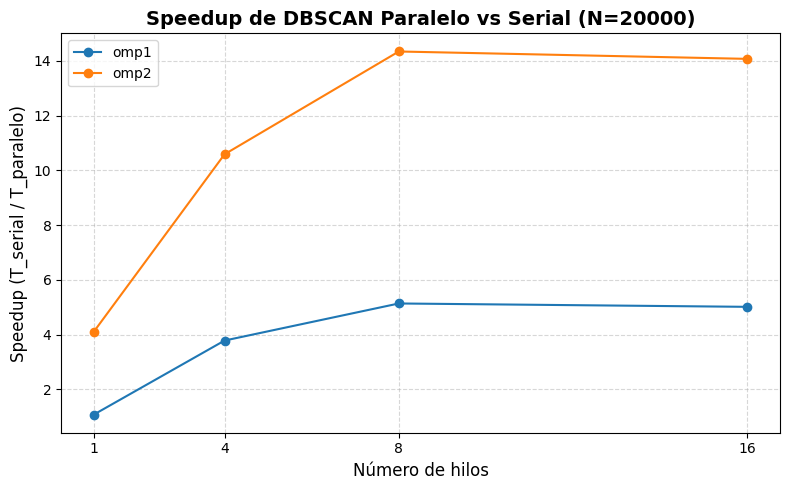

✅ omp1 (N=20000) supera 1.5 → speedup máximo: 5.14
✅ omp2 (N=20000) supera 1.5 → speedup máximo: 14.34


In [12]:
plot_speedup(20000)


### 🔍 Resultados para 40,000 puntos

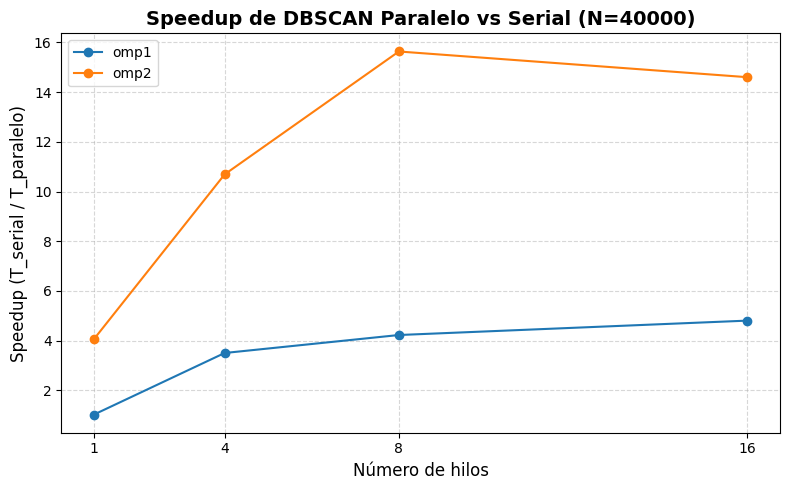

✅ omp1 (N=40000) supera 1.5 → speedup máximo: 4.81
✅ omp2 (N=40000) supera 1.5 → speedup máximo: 15.64


In [13]:
plot_speedup(40000)


### 🔍 Resultados para 80,000 puntos

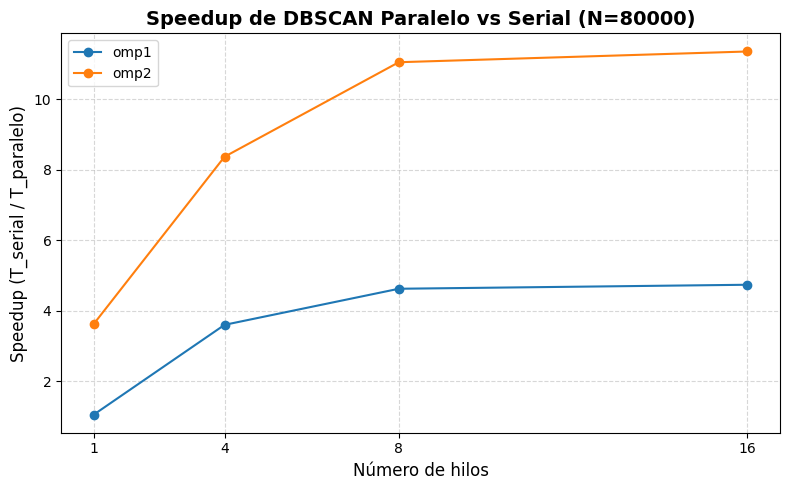

✅ omp1 (N=80000) supera 1.5 → speedup máximo: 4.74
✅ omp2 (N=80000) supera 1.5 → speedup máximo: 11.36


In [14]:
plot_speedup(80000)


### 🔍 Resultados para 120,000 puntos

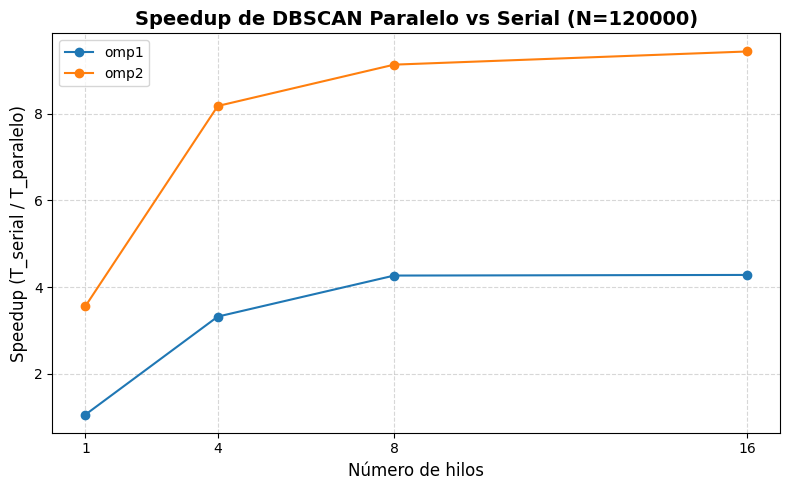

✅ omp1 (N=120000) supera 1.5 → speedup máximo: 4.28
✅ omp2 (N=120000) supera 1.5 → speedup máximo: 9.44


In [15]:
plot_speedup(120000)


### 🔍 Resultados para 140,000 puntos

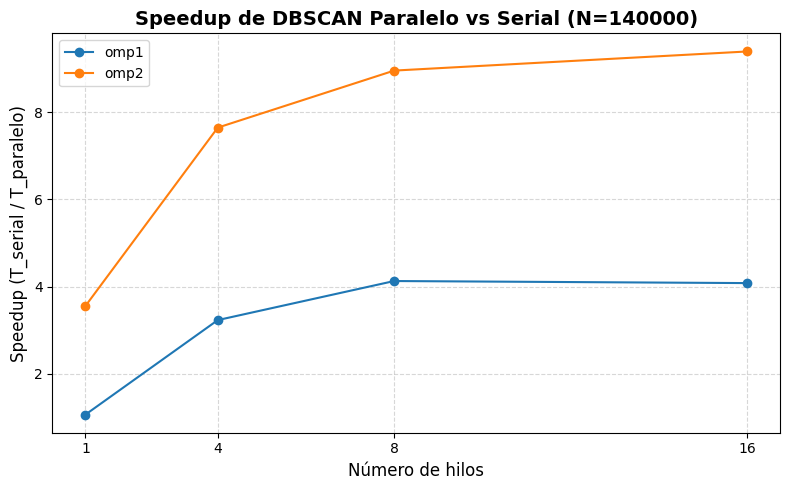

✅ omp1 (N=140000) supera 1.5 → speedup máximo: 4.13
✅ omp2 (N=140000) supera 1.5 → speedup máximo: 9.39


In [16]:
plot_speedup(140000)


### 🔍 Resultados para 160,000 puntos

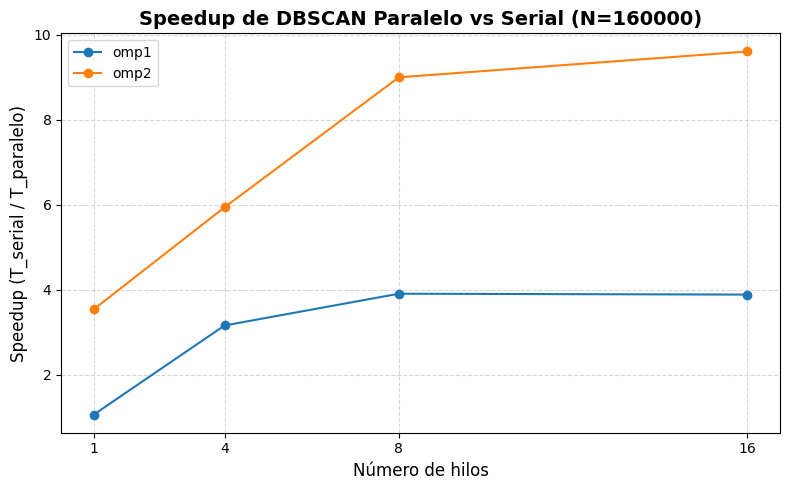

✅ omp1 (N=160000) supera 1.5 → speedup máximo: 3.91
✅ omp2 (N=160000) supera 1.5 → speedup máximo: 9.61


In [17]:
plot_speedup(160000)


### 🔍 Resultados para 180,000 puntos

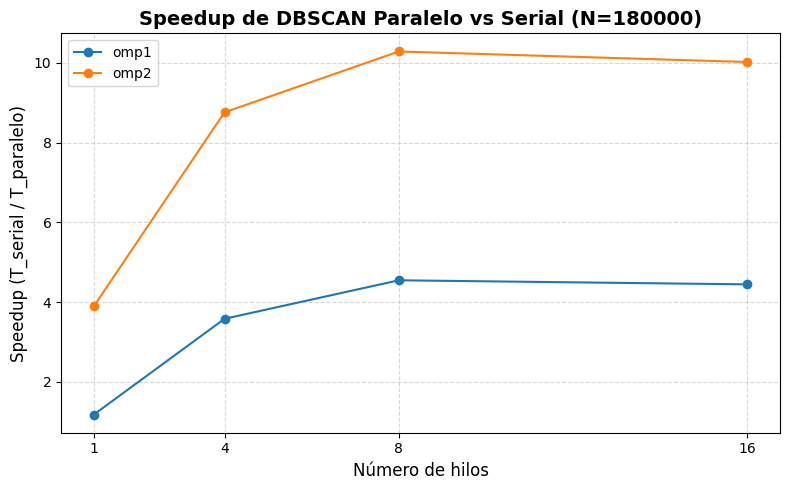

✅ omp1 (N=180000) supera 1.5 → speedup máximo: 4.55
✅ omp2 (N=180000) supera 1.5 → speedup máximo: 10.29


In [18]:
plot_speedup(180000)


### 🔍 Resultados para 200,000 puntos

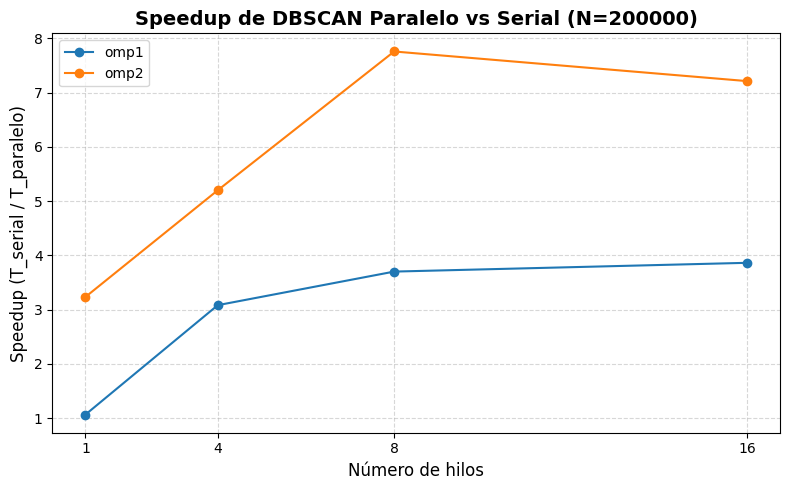

✅ omp1 (N=200000) supera 1.5 → speedup máximo: 3.86
✅ omp2 (N=200000) supera 1.5 → speedup máximo: 7.76


In [19]:
plot_speedup(200000)
